<a href="https://colab.research.google.com/github/Vineelag2122/Machine-Learning/blob/main/Lab7_KNN_AP23110011644.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

In [14]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2


Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 32.6MB/s]


In [15]:

data = pd.read_csv('/content/groceries.csv')
print("Shape of dataset:", data.shape)
data.head()

Shape of dataset: (440, 8)


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [16]:
#to find how many are there in each class 1 2 3
data['class'].value_counts()

,count
class,
2,180
3,173
1,87



Missing values per column:
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64

Data types:
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
class               int64
dtype: object

Class distribution:
class
2    180
3    173
1     87
Name: count, dtype: int64


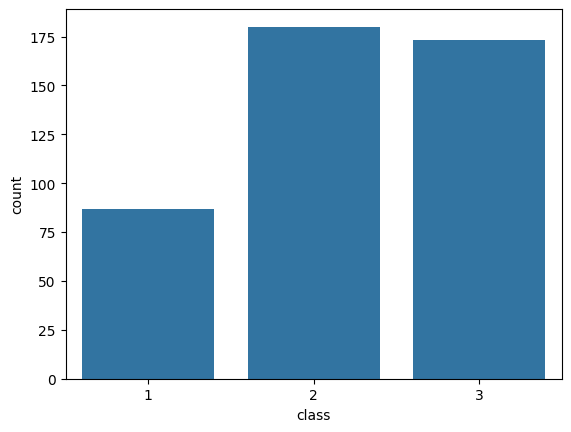


Class distribution (after SMOTE):
2    180
1    180
3    180
Name: count, dtype: int64


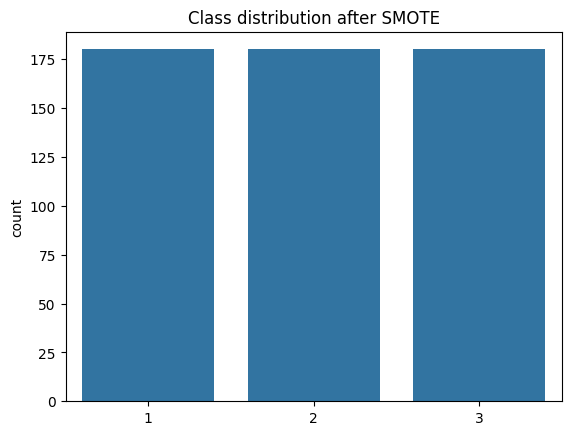

Preprocessing Done ✅


In [18]:
from imblearn.over_sampling import SMOTE
# Step 3: Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

print("=========================================")

# Handle missing values (if any)
data = data.dropna()   # simple strategy, or fillna with mean/median

# Step 4: Check data types
print("\nData types:")
print(data.dtypes)

print("=========================================")

# Step 5: Check class imbalance
print("\nClass distribution:")
print(data['class'].value_counts())  # assuming target column is 'class'

print("=========================================")

sns.countplot(x='class', data=data)
plt.show()

print("==========================================")

# Step 4: Split features/labels
X = data.drop('class', axis=1).values
y = data['class'].values

# Step 5: Apply SMOTE on full dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("\nClass distribution (after SMOTE):")
print(pd.Series(y_res).value_counts())
print("=========================================")

sns.countplot(x=y_res)
plt.title("Class distribution after SMOTE")
plt.show()

print("=========================================")

## Step 6: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Step 7: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing Done ✅")

In [19]:
# Euclidean Distance Function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN Class
class KNN_Scratch:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # get k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Train and Test Scratch KNN
knn_scratch = KNN_Scratch(k=5)
knn_scratch.fit(X_train, y_train)
y_pred_scratch = knn_scratch.predict(X_test)

# Accuracy
accuracy_scratch = np.mean(y_pred_scratch == y_test)
print("Scratch KNN Accuracy:", accuracy_scratch)


Scratch KNN Accuracy: 0.9259259259259259


Sklearn KNN Accuracy: 0.9259259259259259

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.97      0.95        36
           2       1.00      0.83      0.91        36
           3       0.88      0.97      0.92        36

    accuracy                           0.93       108
   macro avg       0.93      0.93      0.93       108
weighted avg       0.93      0.93      0.93       108



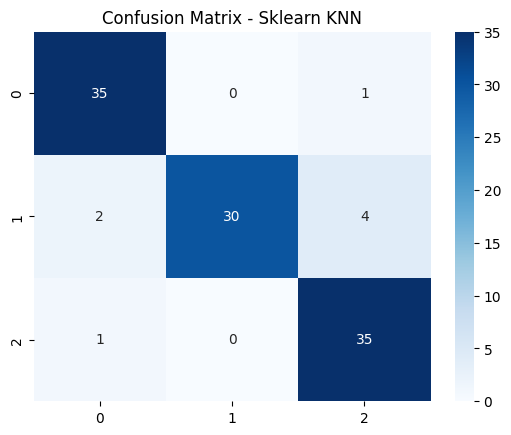

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sklearn KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_sklearn = knn.predict(X_test)

# Evaluation
print("Sklearn KNN Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_sklearn))

sns.heatmap(confusion_matrix(y_test, y_pred_sklearn), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Sklearn KNN")
plt.show()